      intention            time
0       Anxious 0 days 03:00:00
1       Boredom 0 days 03:00:00
2     Commuting 0 days 05:45:00
3         Reply 0 days 01:00:00
4           Sad 0 days 03:25:00
5        Stress 0 days 03:05:00
6        Toilet 0 days 02:45:00
7  cannot sleep 0 days 06:30:00


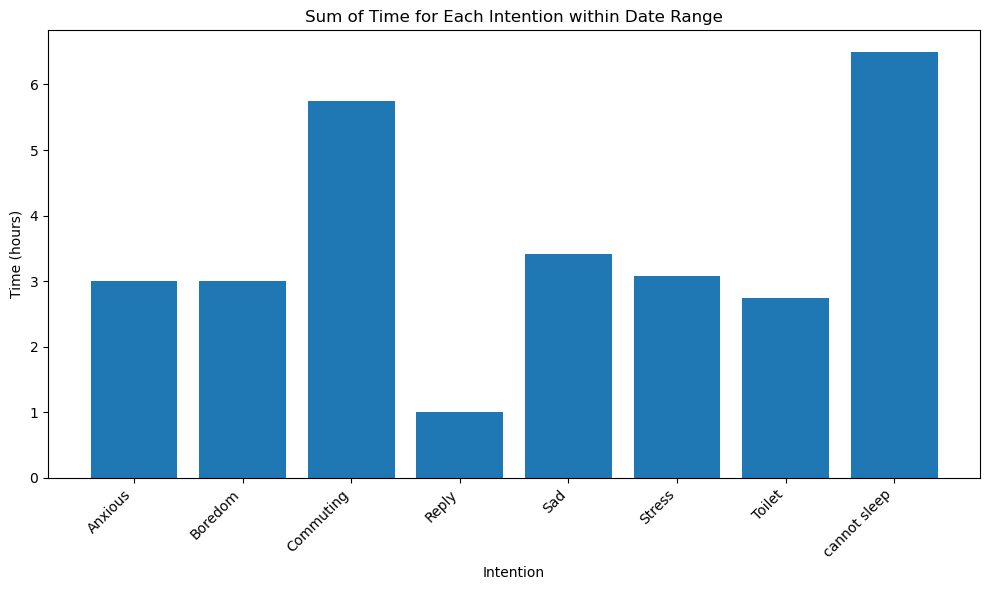

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('IntentionDtaset.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Define the specific date range
start_date = '2023-05-27'
end_date = '2023-06-02'

# Filter the DataFrame to include only the rows within the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Convert the 'time' column to timedelta format (hours and minutes)
filtered_df['time'] = pd.to_timedelta(filtered_df['time'], unit='m')

# Group the filtered data by the "intention" column and calculate the sum of "time" for each group
sum_of_time_per_intention = filtered_df.groupby('intention')['time'].sum().reset_index()

# Print the result
print(sum_of_time_per_intention)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sum_of_time_per_intention['intention'], sum_of_time_per_intention['time'].dt.total_seconds() / 3600)  # Convert Timedelta to hours
plt.xlabel('Intention')
plt.ylabel('Time (hours)')
plt.title('Sum of Time for Each Intention within Date Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
